Our main research question:
- What are the differences between trends of data breach events and the reporting rates of these events from popular traditional media articles?

Our hypotheses:
- Many breaches have very few (<2) articles written about them, despite totalling to more records breached overall
- Some industries (hypothesized: tech, finance) will be disproportionately overreported, while other industries (hypothesized: retail, service) will be disproportionately underreported
- The number of articles written about a breach will correlate more strongly with the number of records breached compared to sector, company size, and sensitivity

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import missingno as msno
from matplotlib import pyplot as plt

# Load data
data = pd.read_csv(
    "../../data/article_company_breach/joined_articles_company_breaches_no_duplicates.csv",
    encoding="ISO-8859-1",
    low_memory=False,
)

In [3]:
# Count the number of articles and TOTAL records lost per breach
# breach_summary = data.groupby('organisation').agg({
#     'records lost': 'sum',
#     'Publication': 'count'
# }).rename(columns={'Publication': 'article_count'})

# # Calculate the proportion of records breached to articles published
# breach_summary['records_per_article'] = breach_summary['records lost'] / breach_summary['article_count']

publication_summary = data.groupby('Publication').agg({
    'records lost': 'sum',  # Total records lost
    'Headline': 'count',  # Count unique headlines

    'sector': 'first',  # Sector of the breach
    'data sensitivity': 'first',  # Sensitivity level
}).rename(columns={'Headline': 'article_count'})  # Rename to make it intuitive

publication_summary = publication_summary.reset_index()


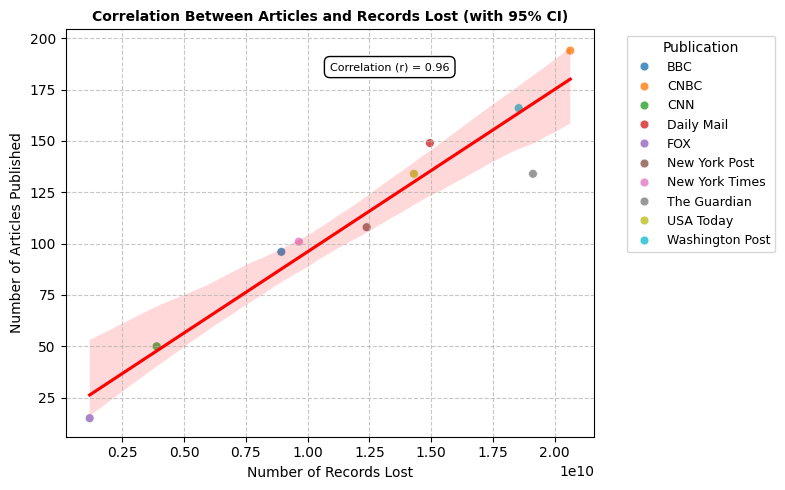

In [9]:
# # Plot correlation between TOTAL articles published vs. TOTAL records lost
# plt.figure(figsize=(8, 5))
# ax = sns.regplot(
#     y='article_count',
#     x='records lost',
#     data=breach_summary,
#     scatter_kws={'alpha': 1, 's': 20},
#     line_kws={'color': 'red'},
#     ci=95,
#     color='black'
# )
# plt.title('Correlation Between Articles and Records Lost (with 95% CI)', fontsize=10, fontweight='bold')
# plt.ylabel('Number of Articles Published', fontsize=10)
# plt.xlabel('Number of Records Lost', fontsize=10)
# plt.grid(axis='both', linestyle='--', alpha=0.7)

# plt.legend(title='Publication', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=9)

# # Annotate outliers
# outliers = breach_summary[breach_summary['records lost'] > breach_summary['records lost'].quantile(0.95)]
# for i, point in outliers.iterrows():
#     ax.annotate(
#         i,
#         (point['article_count'], point['records lost']),
#         textcoords="offset points",
#         xytext=(5, 5),
#         ha='center',
#         fontsize=8,
#         color='blue'
#     )

# plt.tight_layout()
# plt.show()

# plt.close()

import scipy.stats as stats

# Plot correlation between TOTAL articles published vs. TOTAL records lost
plt.figure(figsize=(8, 5))

# Use scatterplot for color-encoding groupby column
scatter = sns.scatterplot(
    data=publication_summary,
    
    y='article_count',
    x='records lost',
    
    hue='Publication',  # Color encoding

    palette='tab10',
    alpha=0.8,
    s=40
)

# Add the regression line using regplot (no scatter points)
reg = sns.regplot(
    y='article_count',
    x='records lost',
    data=publication_summary,
    scatter=False,  # Don't plot scatter points since they're already plotted
    line_kws={'color': 'red'},
    ci=95
)

# Customize the plot
plt.title('Correlation Between Articles and Records Lost (with 95% CI)', fontsize=10, fontweight='bold')
plt.ylabel('Number of Articles Published', fontsize=10)
plt.xlabel('Number of Records Lost', fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Add custom legend for 'Publication'
handles, labels = scatter.get_legend_handles_labels()  # Get legend handles and labels
plt.legend(handles, labels, title='Publication', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=9)


# Calculate correlation coefficient (Pearson's r)
correlation, _ = stats.pearsonr(publication_summary['records lost'], publication_summary['article_count'])

# Get the regression line parameters (slope and intercept)
slope, intercept, rvalue, pvalue, stderr = stats.linregress(publication_summary['records lost'], publication_summary['article_count'])

# Annotate the plot with correlation coefficient and regression parameters
plt.annotate(f'Correlation (r) = {correlation:.2f}', 
             xy=(0.5, 0.9),
             xycoords='axes fraction',
             fontsize=8, 
             color='black', 
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()

plt.close()



Scatter Plot:

- Each point on the plot represents a publication, with the x-axis showing the number of records lost and the y-axis showing the number of articles published about a breach event.
- The points are color-coded by Publication, which means each color corresponds to a specific publication. This allows you to see if different publications cover breaches differently, depending on the total number of records lost.

Regression Line:

- The red regression line represents the overall trend between the total number of records lost and the total number of articles published, computed for the entire dataset.
- The slope of the regression line tells you whether there is a positive or negative relationship between the two variables (i.e., do breaches with more records lost tend to get more articles written about them?).

Confidence Interval (CI):

- The shaded area around the regression line is the 95% confidence interval (CI), which reflects the uncertainty in the estimated regression line. This interval shows where we expect the true regression line to lie, given the data.
- A narrower CI indicates more confidence in the estimate, while a wider CI suggests more uncertainty.

Outliers:

- Outliers are annotated on the plot, and these are breaches with exceptionally high records lost compared to the overall distribution. These breaches are of particular interest because they represent events that might have attracted an unusual amount of media coverage (reflected in a higher article count).

---

General Trend:

- If the regression line slopes upward, it suggests that breaches with more records lost tend to have more articles written about them. This is a typical pattern, as larger breaches (with more records lost) are usually more significant or impactful, leading to higher media coverage.
- Conversely, if the line slopes downward, it indicates that more articles are written about breaches with fewer records lost, which would be an unusual finding.

Confidence Interval:

- The width of the CI is an important factor. If it is narrow, you can be more confident that the relationship between the number of records lost and the number of articles is strong. A wide CI suggests more variation in the data, meaning the relationship might not be as consistent across different breaches.

Publication-Based Insights:

- By color-coding by publication, you can assess whether some publications are more likely to cover breaches with larger or smaller records lost. If certain publications consistently have more articles for a given number of records lost, this could indicate a difference in how these outlets prioritize breaches.
- You may also see if some publications have a more scattered or less concentrated grouping, which could suggest inconsistent coverage based on breach size.

Outliers:

- The outliers could be breaches with extremely high records lost and unusually high article counts. These outliers may represent very high-profile breaches that received disproportionate media coverage. Annotating these outliers helps highlight cases where the correlation might break down, showing that extreme events might skew the data.

---

The scatter plot, augmented with a red regression line and a 95% confidence interval, reveals a generally positive relationship between the number of records lost and the number of articles published about a breach. As expected, larger breaches (with more records lost) tend to receive more media coverage, with the regression line showing a clear upward slope. However, the 95% confidence interval indicates some uncertainty, particularly for breaches with very low or very high numbers of records lost, where article counts vary widely across publications.

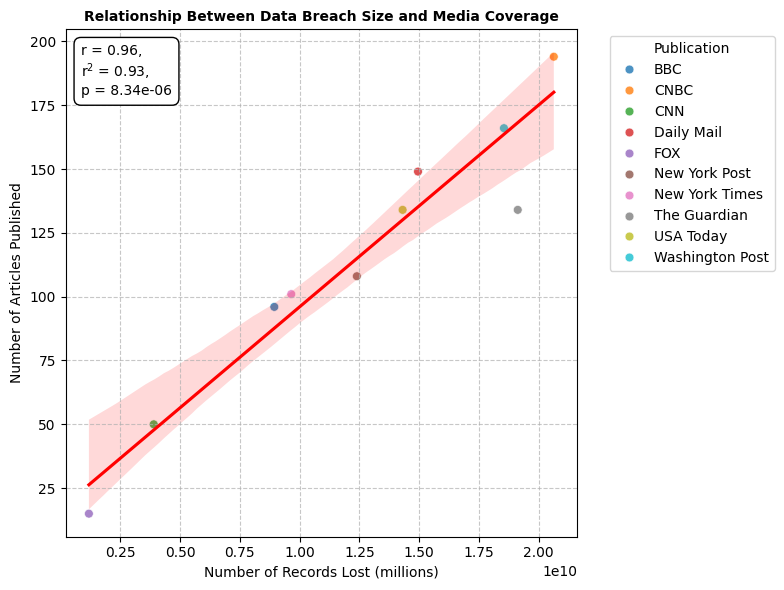

In [34]:
plt.figure(figsize=(8, 6))

# Scatterplot with publication-specific colors
scatter = sns.scatterplot(
    data=publication_summary,
    x='records lost', 
    y='article_count',
    hue='Publication',
    palette='tab10', 
    alpha=0.8,
    s=40
)

# Add regression line
reg = sns.regplot(
    x='records lost', 
    y='article_count',
    data=publication_summary,
    scatter=False, 
    line_kws={'color': 'red'}, 
    ci=95
)

# Customize axes and grid
plt.xlabel('Number of Records Lost (millions)', fontsize=10)
plt.ylabel('Number of Articles Published', fontsize=10)
plt.title('Relationship Between Data Breach Size and Media Coverage', fontsize=10, fontweight='bold')
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Annotate with statistics
plt.annotate(
    f'r = {correlation:.2f},\nr$^2$ = {rvalue**2:.2f},\np = {pvalue:.2e}', 
    xy=(0.03, 0.87), xycoords='axes fraction',
    fontsize=10, color='black',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
)

# Adjust layout
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles, labels, title='Publication', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)
plt.tight_layout()
plt.show()

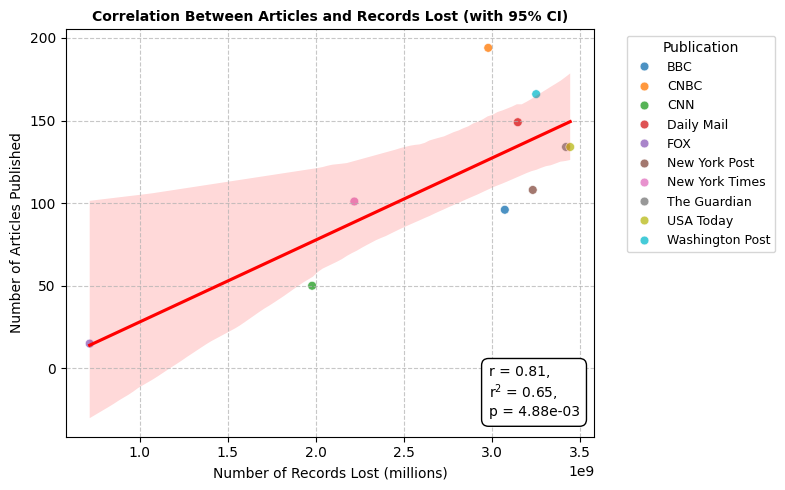

In [120]:
# Deduplicate rows to ensure each breach is counted only once per publication
deduplicated_breach_summary = data.groupby(['Publication', 'ID'], as_index=False).agg({
    'records lost': 'first',  # Take the records lost for the unique breach
    'Headline': 'count',      # Count articles for this breach-publication pair
})

# Aggregate by publication to get the total records lost and article count
publication_summary = deduplicated_breach_summary.groupby('Publication', as_index=False).agg({
    'records lost': 'sum',  # Total records lost across unique breaches
    'Headline': 'sum'       # Total articles published across breaches
}).rename(columns={'Headline': 'article_count'})

# Plot correlation between TOTAL articles published vs. TOTAL records lost
plt.figure(figsize=(8, 5))

# Use scatterplot for color-encoding groupby column
scatter = sns.scatterplot(
    data=publication_summary,
    y='article_count',
    x='records lost',
    hue='Publication',  # Color encoding
    palette='tab10',
    alpha=0.8,
    s=40
)

# Add the regression line using regplot (no scatter points)
reg = sns.regplot(
    y='article_count',
    x='records lost',
    data=publication_summary,
    scatter=False,  # Don't plot scatter points since they're already plotted
    line_kws={'color': 'red'},
    ci=95
)

# Customize the plot
plt.title('Correlation Between Articles and Records Lost (with 95% CI)', fontsize=10, fontweight='bold')
plt.ylabel('Number of Articles Published', fontsize=10)
plt.xlabel('Number of Records Lost (millions)', fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Add custom legend for 'Publication'
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles, labels, title='Publication', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=9)

# Calculate correlation coefficient (Pearson's r)
correlation, _ = stats.pearsonr(publication_summary['records lost'], publication_summary['article_count'])

# Get regression line parameters (slope and intercept)
slope, intercept, rvalue, pvalue, stderr = stats.linregress(publication_summary['records lost'], publication_summary['article_count'])

# Annotate the plot with correlation coefficient and regression parameters
plt.annotate(
    f'r = {correlation:.2f},\nr$^2$ = {rvalue**2:.2f},\np = {pvalue:.2e}', 
    xy=(0.8, 0.05), xycoords='axes fraction',
    fontsize=10, color='black',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
)

plt.tight_layout()
plt.show()

plt.close()

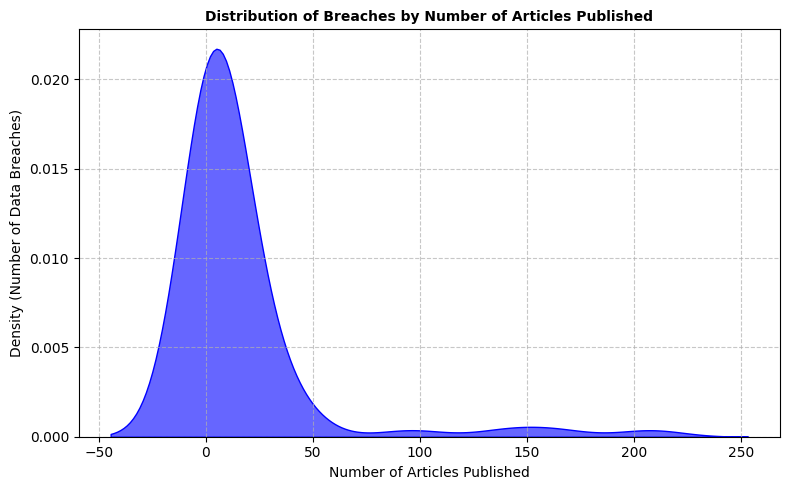

In [36]:

breach_summary = data.groupby('ID').agg({
    'records lost': 'sum',  # Total records lost
    'Headline': 'count',  # Count unique headlines

    'sector': 'first',  # Sector of the breach
    'data sensitivity': 'first',  # Sensitivity level
}).rename(columns={'Headline': 'article_count'})

breach_summary = breach_summary.reset_index()

# Plot density of articles published for all breaches
plt.figure(figsize=(8, 5))

# Use kdeplot for density
sns.kdeplot(
    data=breach_summary,
    x='article_count',
    fill=True,
    color='blue',
    alpha=0.6
)

# Customize plot
plt.title('Distribution of Breaches by Number of Articles Published', fontsize=10, fontweight='bold')
plt.xlabel('Number of Articles Published', fontsize=10)
plt.ylabel('Density (Number of Data Breaches)', fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

plt.close()

What the Grouping Represents:

- By grouping by ID (the unique breach event identifier), each point in the summary dataset corresponds to a single breach event, which may have been reported multiple times (as indicated by the article_count).
    The article_count now represents the total number of unique articles written about each breach event.

Shape of the Distribution:

- The peak of the curve will represent the most common article count for individual breach events. A peak at a low value (e.g., close to 1 or 2) would indicate that most breach events are covered in just a few articles.
- If the curve is right-skewed (longer tail on the right), it suggests that while most breach events are covered by a small number of articles, a few breach events are covered extensively in the media.
- A narrower curve would suggest that the number of articles is fairly consistent across breach events, while a wider curve means that article counts are spread over a larger range of values.

Spread of the Distribution:

- The spread indicates the range of coverage for breaches. A wider curve means that some breach events have only one article, while others might have dozens or more.
    If the plot shows a concentrated area near the low end, it suggests that the majority of breaches receive minimal media coverage, which supports the hypothesis that breaches involving fewer articles are the norm.

Skewness:

- Positively skewed distribution (tail extending to the right) would suggest that while most breaches have low article counts, there are outliers with significantly higher article counts, reflecting rare cases where breaches received more extensive media attention.

---

The density plot of articles published per breach event reveals a distribution with a clear peak at 1-2 articles. This suggests that the majority of breaches are reported on in just a small number of articles, aligning with the hypothesis that many breaches have limited media coverage. The distribution is positively skewed, indicating that while most breaches receive minimal attention, a small number are extensively covered, likely due to their size or the sensitivity of the data involved. The long tail of the curve suggests these outlier breach events are disproportionately covered, reinforcing the idea that breaches with larger impacts tend to attract more media focus. This finding highlights the discrepancy in coverage, with many breaches remaining underreported despite their significant consequences.

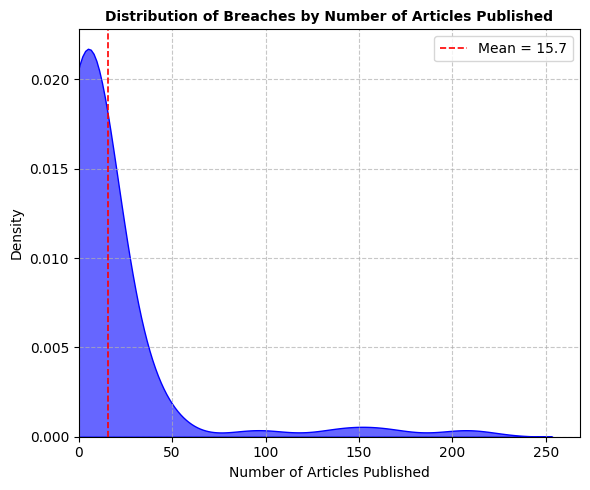

In [53]:
# Filter out rows with negative article counts
breach_summary = data.groupby('ID').agg({
    'records lost': 'sum',  # Total records lost
    'Headline': 'count',    # Count unique headlines (number of articles)
    'sector': 'first',      # Sector of the breach
    'data sensitivity': 'first',  # Sensitivity level
}).rename(columns={'Headline': 'article_count'})

breach_summary = breach_summary.reset_index()

# Remove breaches with negative article counts (if any)
breach_summary = breach_summary[breach_summary['article_count'] >= 0]

# Plot density of articles published for all breaches
plt.figure(figsize=(6, 5))

# Use kdeplot for density
sns.kdeplot(
    data=breach_summary,
    x='article_count',
    fill=True,
    color='blue',
    alpha=0.6,
)

# Add vertical line for the mean article count
mean_articles = breach_summary['article_count'].mean()
plt.axvline(mean_articles, color='red', linestyle='--', linewidth=1.2, label=f'Mean = {mean_articles:.1f}')

# Customize plot
plt.title('Distribution of Breaches by Number of Articles Published', fontsize=10, fontweight='bold')
plt.xlabel('Number of Articles Published', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Add x-axis limits to focus on valid range
plt.xlim(left=0)

# Add legend for mean line
plt.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

plt.close()


/tmp/ipykernel_31414/3824717306.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


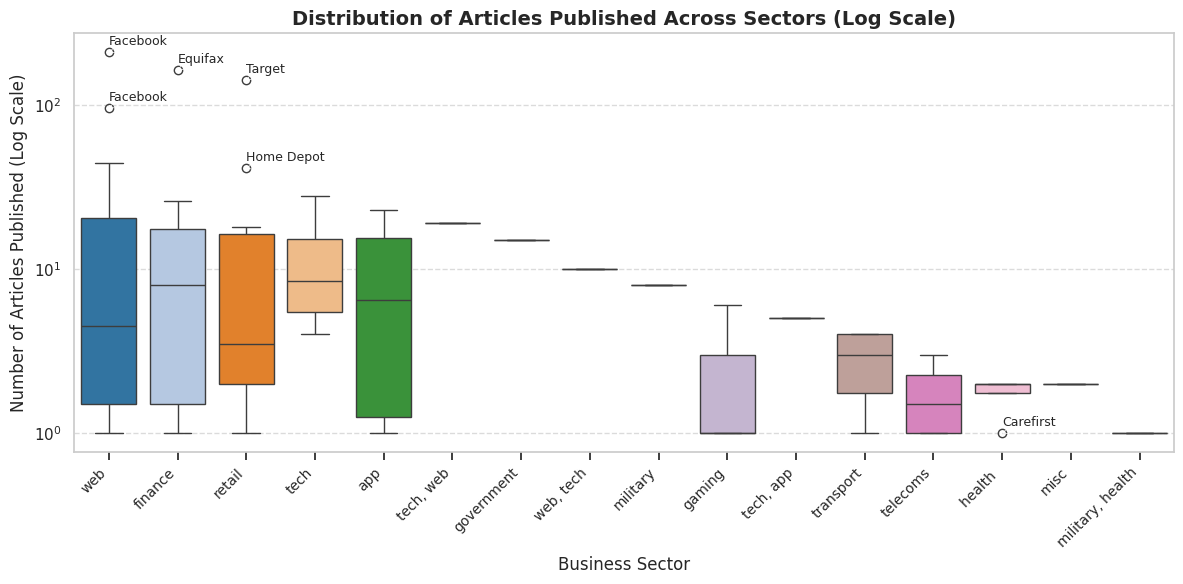

In [22]:
sectorSummary = (
    data.groupby(['sector', 'ID'])
    .agg({
        'Headline': 'nunique',  # Count unique articles per breach
        'records lost': 'sum',    # Sum of records lost for the breach
        'Publication': 'nunique'  # Count unique publications reporting the breach
    })
    .reset_index()
)

sectorSummary.rename(columns={'Headline': 'article_count'}, inplace=True)

# Add in company name for outlier labeling
sectorSummary['organisation'] = data.groupby(['sector', 'ID'])['organisation'].first().reset_index(drop=True)

# Sort x-axis sectors based on highest article count
order = sectorSummary.groupby('sector')['article_count'].max().sort_values(ascending=False).index

# Identify outliers
outliers = []
for sector in sectorSummary['sector'].unique():
    sector_data = sectorSummary[sectorSummary['sector'] == sector]
    Q1 = sector_data['article_count'].quantile(0.25)
    Q3 = sector_data['article_count'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    sector_outliers = sector_data[
        (sector_data['article_count'] < lower_bound) |
        (sector_data['article_count'] > upper_bound)
    ]
    outliers.append(sector_outliers)

plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    x='sector', 
    y='article_count', 
    data=sectorSummary,
    order=order,
    palette='tab20',
    showfliers=True
)

ax.set_yscale('log')

plt.title('Distribution of Articles Published Across Sectors (Log Scale)', fontsize=14, fontweight='bold')
plt.xlabel('Business Sector', fontsize=12)
plt.ylabel('Number of Articles Published (Log Scale)', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=10)
ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)

# Add annotations for outliers
outliers = pd.concat(outliers)
for _, row in outliers.iterrows():
    ax.annotate(
        row['organisation'], 
        (sectorSummary.loc[row.name, 'sector'], row['article_count']),
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=9,
        arrowprops=dict(facecolor='black', arrowstyle="->", lw=0.5)
    )

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

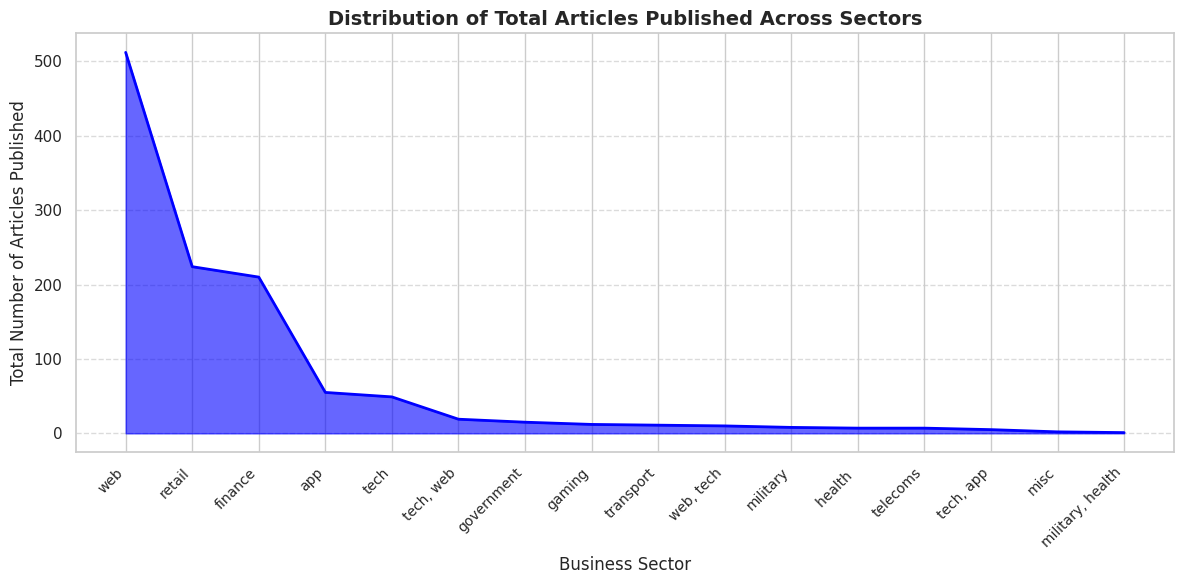

In [33]:
# Calculate total articles per sector
sector_article_counts = sectorSummary.groupby('sector')['article_count'].sum().sort_values(ascending=False)

# Plot the area histogram
plt.figure(figsize=(12, 6))
plt.fill_between(
    sector_article_counts.index,  # Sectors
    sector_article_counts.values,  # Total article counts
    color='blue',
    alpha=0.6
)
plt.plot(
    sector_article_counts.index,
    sector_article_counts.values,
    color='blue',
    linewidth=2
)

# Enhance plot aesthetics
plt.title('Distribution of Total Articles Published Across Sectors', fontsize=14, fontweight='bold')
plt.xlabel('Business Sector', fontsize=12)
plt.ylabel('Total Number of Articles Published', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

/tmp/ipykernel_1664/3129705379.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=aggregated_data, x='sector', y='total_articles', ci=None, ax=axes[0], label='Total Articles', color='blue', linewidth=2)
/tmp/ipykernel_1664/3129705379.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=aggregated_data, x='sector', y='total_records_lost', ci=None, ax=axes[1], label='Total Records Lost', color='red', linewidth=2)


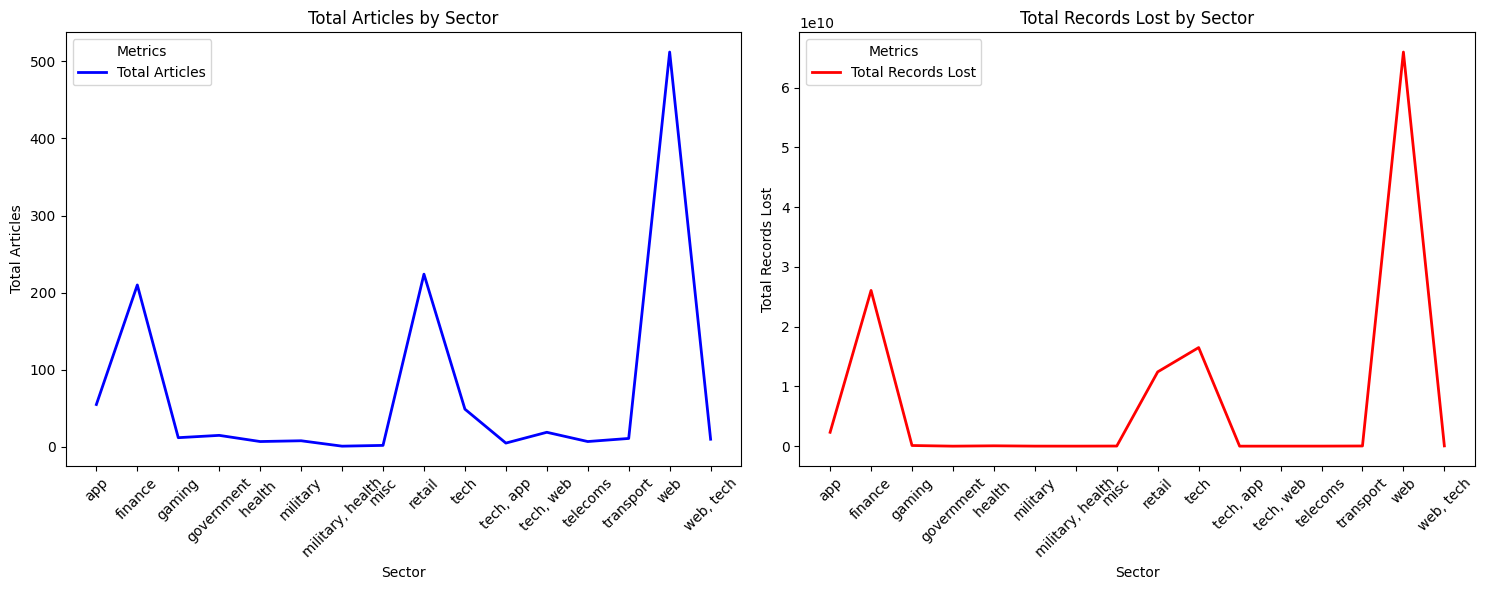

In [4]:
# Assuming you have the dataset loaded into a pandas DataFrame
df = pd.read_csv(
    "../../data/article_company_breach/joined_articles_company_breaches_no_duplicates.csv",
    encoding="ISO-8859-1",
    low_memory=False,
)

# Cleaning and preprocessing
df['records lost'] = pd.to_numeric(df['records lost'], errors='coerce')  # Ensure records lost is numeric

# Aggregating data for total articles by sector (counting Headlines)
articles_by_sector = df.groupby('sector')['Headline'].count().reset_index()
articles_by_sector.columns = ['sector', 'total_articles']

# Aggregating data for total records lost by sector (sum of records for unique breaches)
records_by_sector = df.groupby('sector')['records lost'].sum().reset_index()
records_by_sector.columns = ['sector', 'total_records_lost']

# Merge both dataframes on sector
aggregated_data = pd.merge(articles_by_sector, records_by_sector, on='sector', how='outer')

# Create the figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=False)

# Plot for Total Articles (count of Headlines)
sns.lineplot(data=aggregated_data, x='sector', y='total_articles', ci=None, ax=axes[0], label='Total Articles', color='blue', linewidth=2)
axes[0].set_title('Total Articles by Sector')
axes[0].set_xlabel('Sector')
axes[0].set_ylabel('Total Articles')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Metrics')

# Plot for Total Records Lost
sns.lineplot(data=aggregated_data, x='sector', y='total_records_lost', ci=None, ax=axes[1], label='Total Records Lost', color='red', linewidth=2)
axes[1].set_title('Total Records Lost by Sector')
axes[1].set_xlabel('Sector')
axes[1].set_ylabel('Total Records Lost')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Metrics')

# # Plot for Total Records Lost with Logarithmic y-axis
# sns.lineplot(data=aggregated_data, x='sector', y='total_records_lost', ci=None, ax=axes[1], label='Total Records Lost', color='red', linewidth=2)
# axes[1].set_title('Total Records Lost by Sector')
# axes[1].set_xlabel('Sector')
# axes[1].set_ylabel('Total Records Lost')
# axes[1].tick_params(axis='x', rotation=45)
# axes[1].set_yscale('log')  # Apply log scale to the y-axis
# axes[1].legend(title='Metrics')

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plots
plt.show()

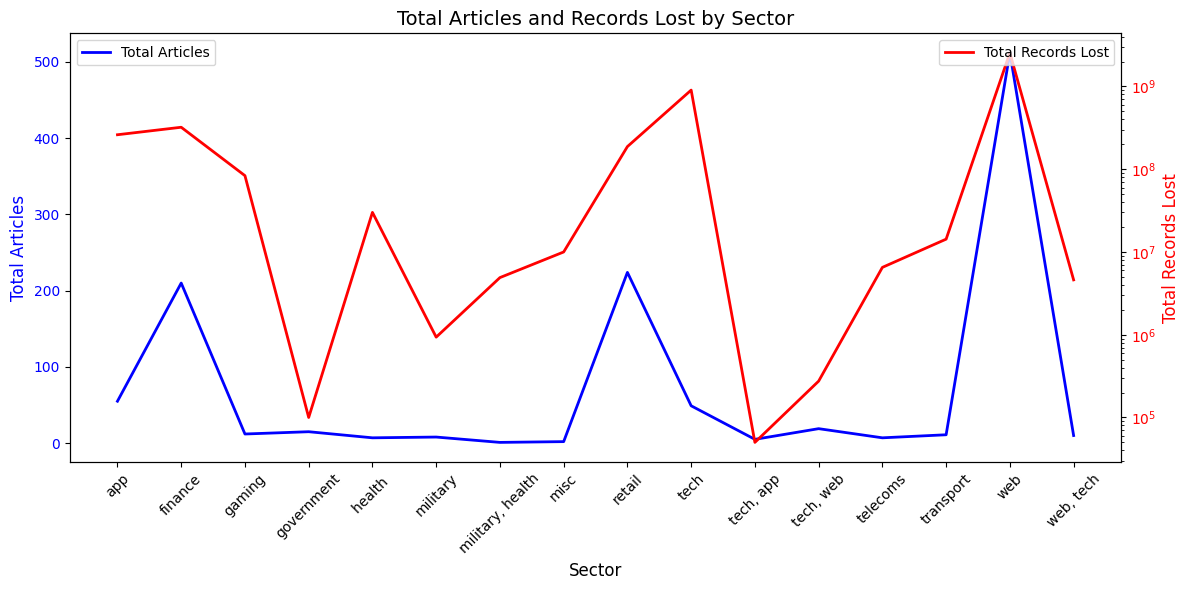

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is already loaded and preprocessed as above
df = pd.read_csv(
    "../../data/article_company_breach/joined_articles_company_breaches_no_duplicates.csv",
    encoding="ISO-8859-1",
    low_memory=False,
)

# Cleaning and preprocessing
df['records lost'] = pd.to_numeric(df['records lost'], errors='coerce')  # Ensure records lost is numeric

# Aggregating data for total articles by sector (counting Headlines)
articles_by_sector = df.groupby('sector')['Headline'].count().reset_index()
articles_by_sector.columns = ['sector', 'total_articles']

# Assuming 'breach_id' is the unique identifier for each breach in the dataset
# Drop duplicate breaches to ensure we only count unique breaches
unique_breaches = df.drop_duplicates(subset='ID')

# Aggregate total articles by sector (counting headlines as before)
articles_by_sector = df.groupby('sector')['Headline'].count().reset_index()
articles_by_sector.columns = ['sector', 'total_articles']

# Aggregate total records lost by sector (summing only unique breaches)
records_by_sector = unique_breaches.groupby('sector')['records lost'].sum().reset_index()
records_by_sector.columns = ['sector', 'total_records_lost']

# Merge both dataframes on sector
aggregated_data = pd.merge(articles_by_sector, records_by_sector, on='sector', how='outer')


# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Total Articles on the left y-axis
color_articles = 'blue'
ax1.set_title('Total Articles and Records Lost by Sector', fontsize=14)
ax1.set_xlabel('Sector', fontsize=12)
ax1.set_ylabel('Total Articles', color=color_articles, fontsize=12)
sns.lineplot(data=aggregated_data, x='sector', y='total_articles', ax=ax1, color=color_articles, label='Total Articles', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_articles)
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='upper left')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
color_records = 'red'
ax2.set_ylabel('Total Records Lost', color=color_records, fontsize=12)
sns.lineplot(data=aggregated_data, x='sector', y='total_records_lost', ax=ax2, color=color_records, label='Total Records Lost', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_records)
ax2.set_yscale('log')  # Optional: Apply log scale for better visualization if values differ greatly
ax2.legend(loc='upper right')

# Adjust layout to avoid overlap
fig.tight_layout()

# Display the plot
plt.show()


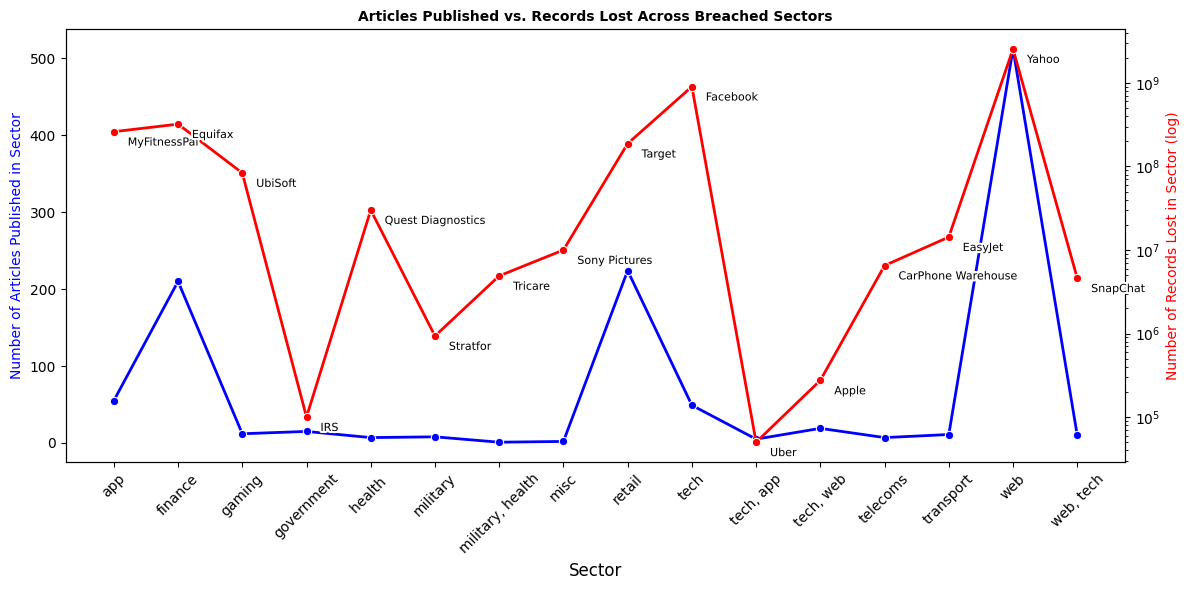

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.patheffects import withStroke

# Load and preprocess the dataset
df = pd.read_csv(
    "../../data/article_company_breach/joined_articles_company_breaches_no_duplicates.csv",
    encoding="ISO-8859-1",
    low_memory=False,
)

# Ensure 'records lost' is numeric
df['records lost'] = pd.to_numeric(df['records lost'], errors='coerce')

# Deduplicate breaches based on their unique breach ID
unique_breaches = df.drop_duplicates(subset='ID')

# Aggregate total articles by sector (counting headlines as before)
articles_by_sector = df.groupby('sector')['Headline'].count().reset_index()
articles_by_sector.columns = ['sector', 'total_articles']

# Aggregate total records lost by sector (summing only unique breaches)
records_by_sector = unique_breaches.groupby('sector')['records lost'].sum().reset_index()
records_by_sector.columns = ['sector', 'total_records_lost']

# Merge both dataframes on sector
aggregated_data = pd.merge(articles_by_sector, records_by_sector, on='sector', how='outer')

# Find the companies with the highest articles and records lost for each sector
highest_articles = (
    df.groupby(['sector', 'organisation'])['Headline']
    .count()
    .reset_index()
    .sort_values(by=['sector', 'Headline'], ascending=[True, False])
    .drop_duplicates(subset=['sector'])
    .set_index('sector')['organisation']
    .to_dict()
)

highest_records_lost = (
    unique_breaches.groupby(['sector', 'organisation'])['records lost']
    .sum()
    .reset_index()
    .sort_values(by=['sector', 'records lost'], ascending=[True, False])
    .drop_duplicates(subset=['sector'])
    .set_index('sector')['organisation']
    .to_dict()
)

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Total Articles on the left y-axis
color_articles = 'blue'
ax1.set_title('Articles Published vs. Records Lost Across Breached Sectors', fontsize=10, fontweight='bold')
ax1.set_xlabel('Sector', fontsize=12)
ax1.set_ylabel('Number of Articles Published in Sector', color=color_articles, fontsize=10)
sns.lineplot(data=aggregated_data, x='sector', y='total_articles', ax=ax1, color=color_articles, label='Total Articles', linewidth=2, marker='o', legend=False)
ax1.tick_params(axis='y', labelcolor='black')
ax1.tick_params(axis='x', rotation=45)
# ax1.legend(loc='upper center')

# Annotate the company with the highest articles for each sector
# for index, row in aggregated_data.iterrows():
#     sector = row['sector']
#     if sector in highest_articles:
#         company_name = highest_articles[sector]
#         ax1.annotate(
#             company_name,
#             xy=(row['sector'], row['total_articles']),
#             xytext=(10, 5),  # Offset for annotation
#             textcoords='offset points',
#             fontsize=8,
#             color=color_articles,
#         )

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
color_records = 'red'
ax2.set_ylabel('Number of Records Lost in Sector (log)', color=color_records, fontsize=10)
sns.lineplot(data=aggregated_data, x='sector', y='total_records_lost', ax=ax2, color=color_records, label='Total Records Lost', linewidth=2, marker='o', legend=False)
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_yscale('log')  # Optional: Apply log scale for better visualization if values differ greatly
# ax2.legend(loc='upper right')

outline_effect = [withStroke(linewidth=3, foreground="white")]

# Annotate the company with the highest records lost for each sector
for index, row in aggregated_data.iterrows():
    sector = row['sector']
    if sector in highest_records_lost:
        company_name = highest_records_lost[sector]
        ax2.annotate(
            company_name,
            xy=(row['sector'], row['total_records_lost']),
            xytext=(10, -10),  # Offset for annotation
            textcoords='offset points',
            fontsize=8,
            color='black',
            path_effects=outline_effect
        )

# Adjust layout to avoid overlap
fig.tight_layout()

# Display the plot
plt.show()


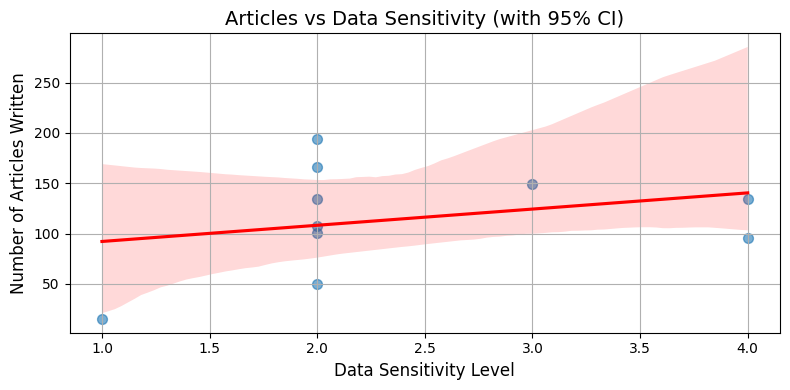

In [ ]:
# Group data to create article_count, and aggregate necessary variables
summary = data.groupby('Publication').agg({
    'records lost': 'sum',  # Total records lost
    'Headline': 'count',  # Count of headlines/articles

    'total employee estimate': 'first',  # Assume company_size is consistent for a sector
    'data sensitivity': 'first',  # Assuming sensitivity level is consistent within a sector
}).reset_index().rename(columns={'Headline': 'article_count'})  # Rename for clarity

# 2. Create regplot for Articles vs Data Sensitivity
plt.figure(figsize=(8, 4))
ax = sns.regplot(
    x='data sensitivity',  # Data sensitivity level
    y='article_count',  # Number of articles
    data=summary,
    scatter_kws={'s': 50, 'alpha': 0.6},  # Adjust scatter point size and transparency
    line_kws={'color': 'red'},  # Regression line color
    ci=95  # 95% Confidence interval
)

plt.title('Articles vs Data Sensitivity (with 95% CI)', fontsize=14)
plt.xlabel('Data Sensitivity Level', fontsize=12)
plt.ylabel('Number of Articles Written', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()